## Dimensões & Estrutura

In [1]:

import pandas as pd
train = pd.read_csv('/home/giova/workspace/open-polymer-prediction/data/raw/train.csv')
test = pd.read_csv('/home/giova/workspace/open-polymer-prediction/data/raw/test.csv')
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(train.dtypes)
train.head()


Train shape: (7973, 7)
Test shape: (3, 2)
id           int64
SMILES      object
Tg         float64
FFV        float64
Tc         float64
Density    float64
Rg         float64
dtype: object


,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN


## Valores Ausentes

In [26]:
train.isna().mean()

id         0.000000
SMILES     0.000000
Tg         0.935909
FFV        0.118274
Tc         0.907563
Density    0.923116
Rg         0.922990
dtype: float64

Missing % in train:
id          0.000000
SMILES      0.000000
Tg         93.590869
FFV        11.827418
Tc         90.756303
Density    92.311551
Rg         92.299009
dtype: float64


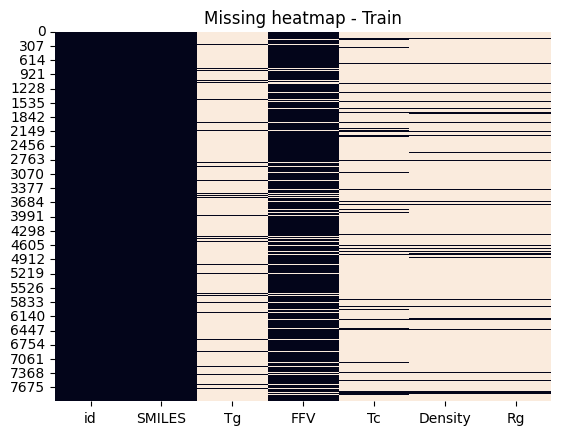

In [3]:

missing_train = train.isnull().mean() * 100
print("Missing % in train:")
print(missing_train)
import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(train.isnull(), cbar=False)
plt.title("Missing heatmap - Train")
plt.show()


## Estatísticas Básicas

In [4]:

print(train[['Tg','FFV','Tc','Density','Rg']].describe())


               Tg          FFV          Tc     Density          Rg
count  511.000000  7030.000000  737.000000  613.000000  614.000000
mean    96.452314     0.367212    0.256334    0.985484   16.419787
std    111.228279     0.029609    0.089538    0.146189    4.608640
min   -148.029738     0.226992    0.046500    0.748691    9.728355
25%     13.674509     0.349549    0.186000    0.890243   12.540328
50%     74.040183     0.364264    0.236000    0.948193   15.052194
75%    161.147595     0.380790    0.330500    1.062096   20.411067
max    472.250000     0.777097    0.524000    1.840999   34.672906


## Distribuição dos Targets

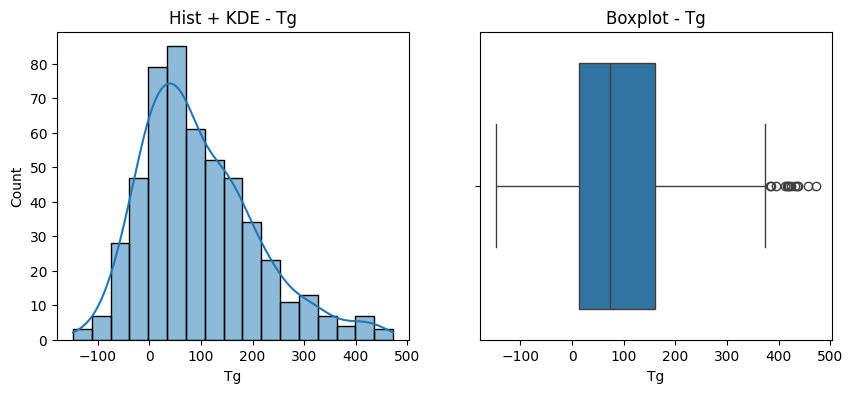

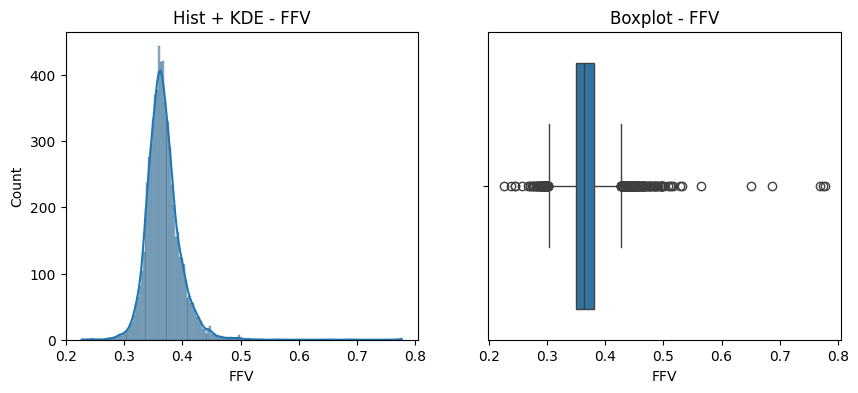

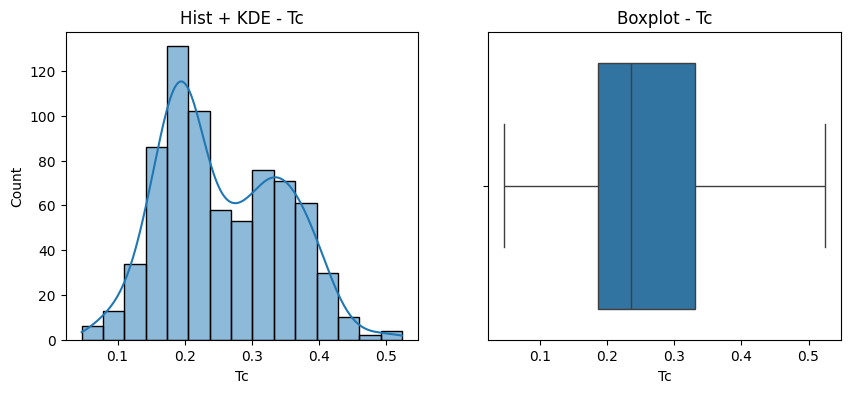

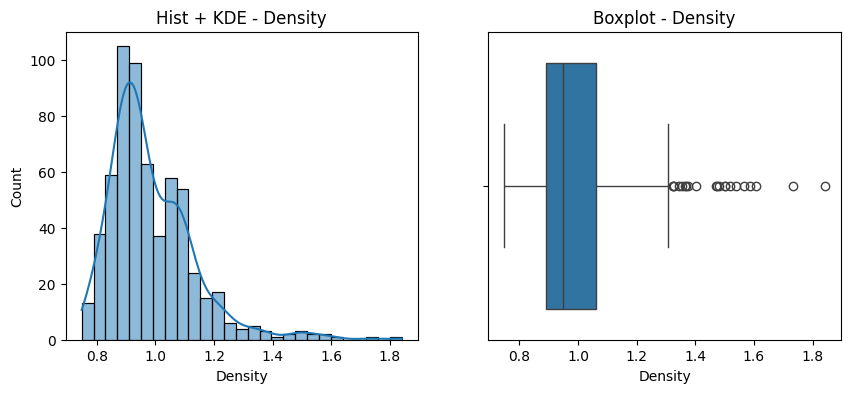

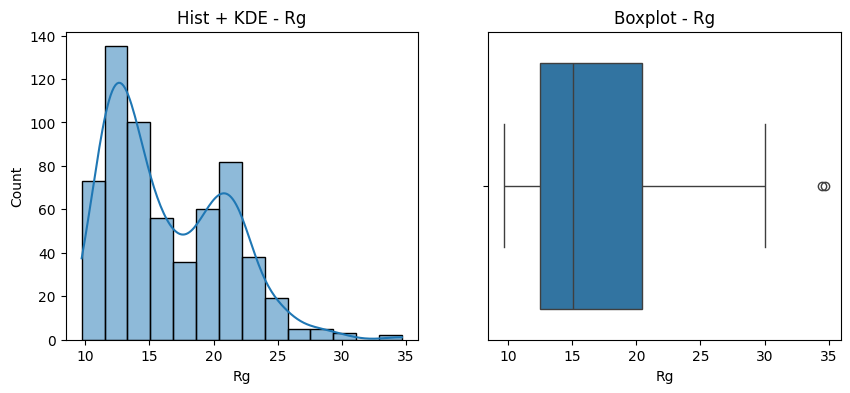

In [5]:

import seaborn as sns, matplotlib.pyplot as plt
for col in ['Tg','FFV','Tc','Density','Rg']:
    fig, axes = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(train[col].dropna(), kde=True, ax=axes[0]).set_title(f'Hist + KDE - {col}')
    sns.boxplot(x=train[col].dropna(), ax=axes[1]).set_title(f'Boxplot - {col}')
    plt.show()


## Correlação Entre Propriedades

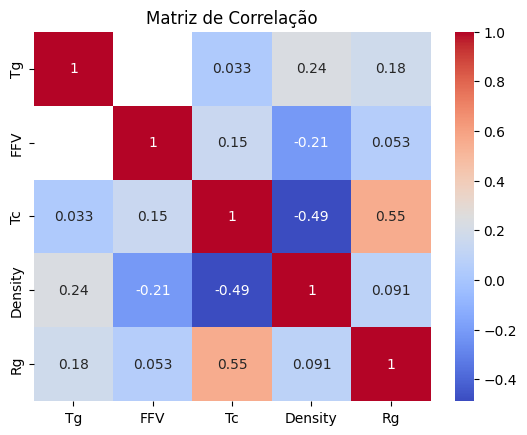

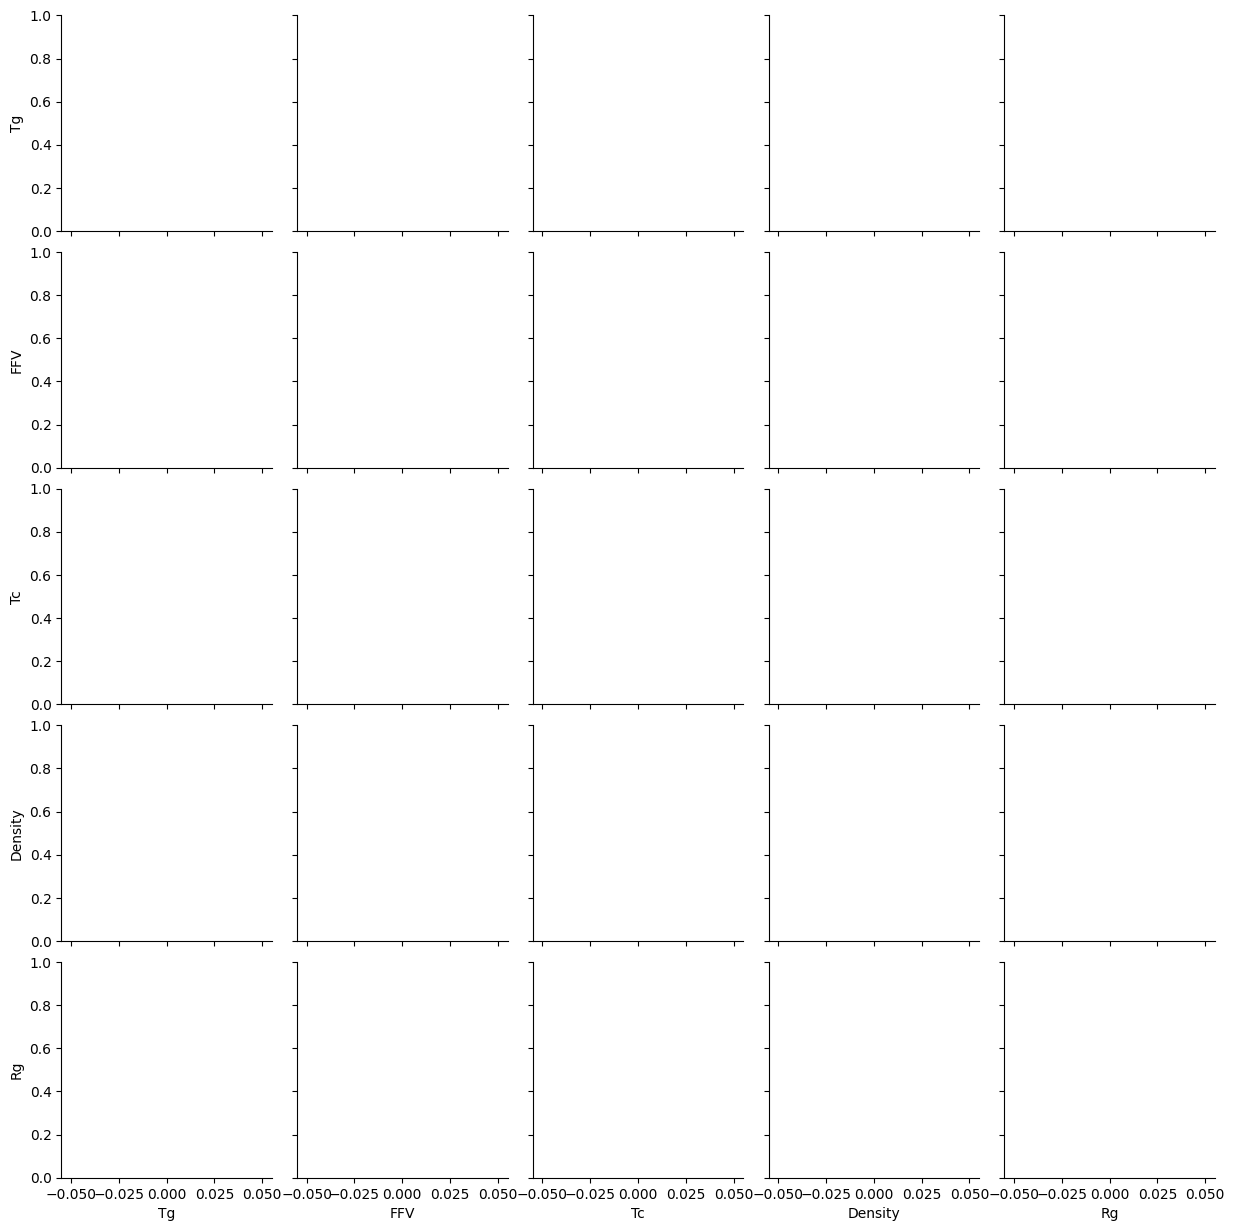

In [6]:

corr = train[['Tg','FFV','Tc','Density','Rg']].corr()
import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

sns.pairplot(train[['Tg','FFV','Tc','Density','Rg']].dropna())
plt.show()


In [20]:
corr

,Tg,FFV,Tc,Density,Rg
Tg,1.000000,NaN,0.033300,0.235291,0.180072
FFV,NaN,1.000000,0.149878,-0.214185,0.053396
Tc,0.033300,0.149878,1.000000,-0.488476,0.554758
Density,0.235291,-0.214185,-0.488476,1.000000,0.091138
Rg,0.180072,0.053396,0.554758,0.091138,1.000000


## SMILES & Molecule Validity

In [8]:

from rdkit import Chem
total = len(train['SMILES'])
unique = train['SMILES'].nunique()
print(f"Total SMILES: {total}, Unique: {unique}")
valid = train['SMILES'].apply(lambda s: Chem.MolFromSmiles(s) is not None).mean() * 100
print(f"Valid SMILES %: {valid:.2f}%")
canon = train['SMILES'].apply(lambda s: Chem.MolToSmiles(Chem.MolFromSmiles(s), canonical=True))
dups = total - canon.nunique()
print("Duplicate SMILES count:", dups)


Total SMILES: 7973, Unique: 7973
Valid SMILES %: 100.00%
Duplicate SMILES count: 0


## Estatísticas de SMILES

In [44]:
sm='*CC(*)c1ccccc1C(=O)OCCCCCC'
for atom in Chem.MolFromSmiles(sm).GetAtoms():
    print(atom.GetAtomicNum())

0
6
6
0
6
6
6
6
6
6
6
8
8
6
6
6
6
6
6


In [9]:

lengths = train['SMILES'].str.len()
print("SMILES length stats:", lengths.describe())
atom_counts = train['SMILES'].apply(lambda s: Chem.MolFromSmiles(s).GetNumAtoms() if Chem.MolFromSmiles(s) else None)
bond_counts = train['SMILES'].apply(lambda s: Chem.MolFromSmiles(s).GetNumBonds() if Chem.MolFromSmiles(s) else None)
print("Atom counts stats:", atom_counts.describe())
print("Bond counts stats:", bond_counts.describe())
# Aromatic count example
aromatic = train['SMILES'].apply(lambda s: any(atom.GetIsAromatic() for atom in Chem.MolFromSmiles(s).GetAtoms()))
print("Aromatic molecules %:", aromatic.mean()*100)


SMILES length stats: count    7973.000000
mean       58.353317
std        33.399405
min         3.000000
25%        33.000000
50%        52.000000
75%        77.000000
max       306.000000
Name: SMILES, dtype: float64
Atom counts stats: count    7973.000000
mean       34.294870
std        17.957264
min         3.000000
25%        20.000000
50%        31.000000
75%        45.000000
max       166.000000
Name: SMILES, dtype: float64
Bond counts stats: count    7973.000000
mean       36.953719
std        20.662551
min         2.000000
25%        21.000000
50%        34.000000
75%        49.000000
max       181.000000
Name: SMILES, dtype: float64
Aromatic molecules %: 79.64379781763452


## Features Químicas

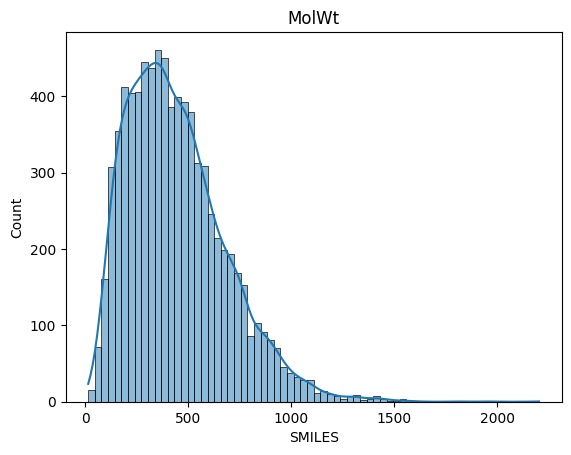

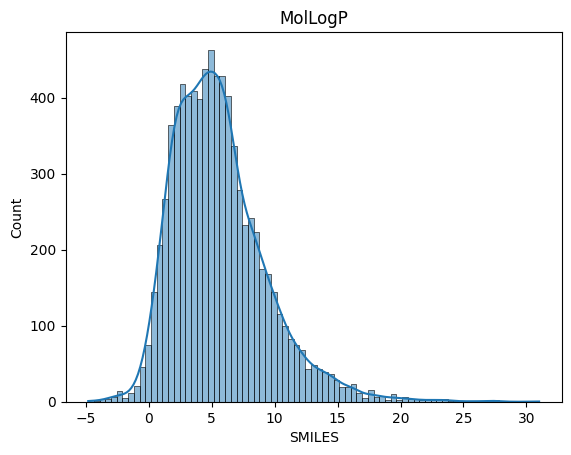

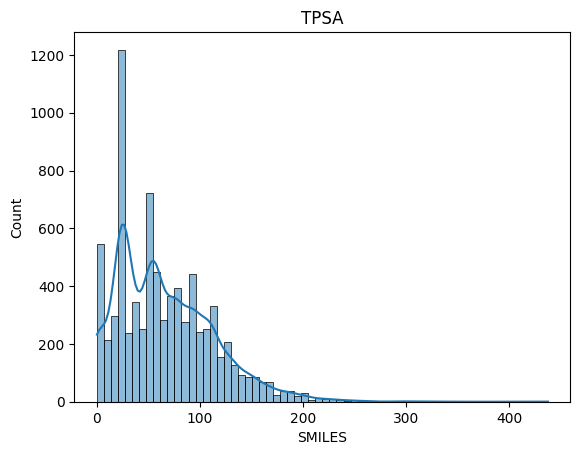

In [10]:

from rdkit.Chem import Descriptors
for d in ['MolWt','MolLogP','TPSA']:
    sns.histplot(train['SMILES'].apply(lambda s: Descriptors.__dict__[d](Chem.MolFromSmiles(s))) , kde=True)
    plt.title(d)
    plt.show()


## Topologia de Grafo

In [12]:

import networkx as nx
from rdkit.Chem import rdmolops
diameters = []
paths = []
cycles = []
for s in train['SMILES']:
    mol = Chem.MolFromSmiles(s)
    adj = rdmolops.GetAdjacencyMatrix(mol)
    G = nx.from_numpy_array(adj)
    diameters.append(nx.diameter(G) if nx.is_connected(G) else 0)
    paths.append(nx.average_shortest_path_length(G) if nx.is_connected(G) else 0)
    cycles.append(len(list(nx.cycle_basis(G))))
import pandas as pd
df_graph = pd.DataFrame({'diameter':diameters,'avg_path':paths,'cycles':cycles})
print(df_graph.describe())


          diameter     avg_path       cycles
count  7973.000000  7973.000000  7973.000000
mean     19.073498     7.235640     3.658849
std       9.657084     3.236441     3.063389
min       2.000000     1.333333     0.000000
25%      11.000000     4.631579     1.000000
50%      18.000000     6.873400     3.000000
75%      25.000000     9.227937     6.000000
max      69.000000    24.821271    18.000000


## Relação Feature × Target

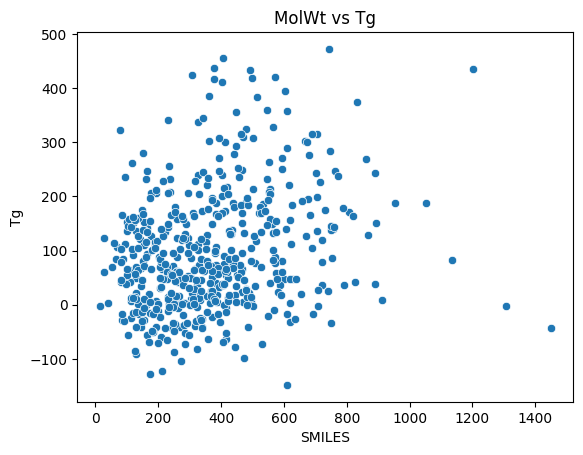

Correlation MolWt-Tg: 0.2508092232435514


In [13]:

# Example: correlation of MolWt vs Tg
mw = train['SMILES'].apply(lambda s: Descriptors.MolWt(Chem.MolFromSmiles(s)))
sns.scatterplot(x=mw, y=train['Tg'])
plt.title("MolWt vs Tg")
plt.show()

corr_mw_tg = mw.corr(train['Tg'])
print("Correlation MolWt-Tg:", corr_mw_tg)


## Checks de Leak & Overlap

In [14]:

overlap = set(train['SMILES']) & set(test['SMILES'])
print("Overlap SMILES count:", len(overlap))


Overlap SMILES count: 0


## Clusters & Embeddings

[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerator
[23:56:20] DEPRECATION WARNING: please use MorganGenerat

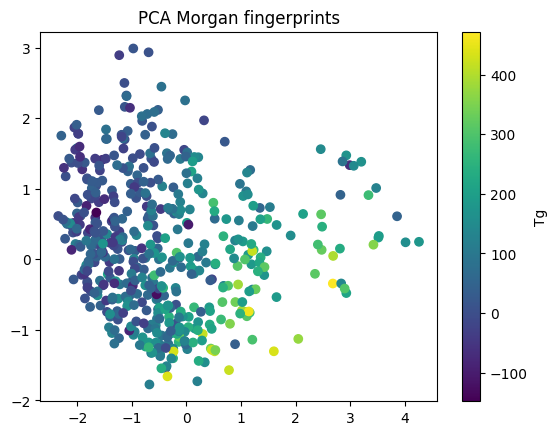

In [16]:

from sklearn.decomposition import PCA
from rdkit.Chem import AllChem
fps = train['SMILES'].apply(lambda s: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s),2,1024))
import numpy as np
X = np.array([list(fp) for fp in fps])
pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:,0], coords[:,1], c=train['Tg'], cmap='viridis')
plt.colorbar(label='Tg')
plt.title("PCA Morgan fingerprints")
plt.show()


## Análise de Valores Extremos

In [17]:

for col in ['Tg','Tc','Density']:
    q1, q3 = train[col].quantile([0.25,0.75])
    iqr = q3-q1
    outliers = train[(train[col] < q1-1.5*iqr) | (train[col] > q3+1.5*iqr)]
    print(f"{col} outliers count:", len(outliers))


Tg outliers count: 13
Tc outliers count: 0
Density outliers count: 21


## Missing Pattern no Train Suplementar

In [18]:

# Assumindo colunas extras prefixadas dataset1, etc.
extra_cols = [c for c in train.columns if 'dataset' in c.lower()]
print("Extra dataset columns:", extra_cols)
print(train[extra_cols].isnull().mean()*100)


Extra dataset columns: []
Series([], dtype: float64)


## Resumo Final

In [19]:

# Simple summary
print(f"Invalid SMILES %: {(100-valid):.2f}%")
print(f"Tg range: {train['Tg'].min()} to {train['Tg'].max()}")
# Adicione mais insights manualmente aqui...


Invalid SMILES %: 0.00%
Tg range: -148.0297376 to 472.25
